In [3]:
print(__doc__)
#lambda、訓練誤差、テスト誤差、そのプロットを表示します
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def f(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

#degree=30の多項式特徴量による正則化多項式回帰において、
#正則化パラメータlambdaを1e-30から100まで変化させます
#degree of polinomial features
degree = 30

#reguralization parameters
#正則化項
alphas = [1e-30,1e-20,1e-10,1e-5, 1e-3,1e-2,1e-1, 1,10,100]

#training samples
X = np.sort(np.random.rand(n_samples))
y = f(X) + np.random.randn(n_samples) * 0.1



Automatically created module for IPython interactive environment


/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/y

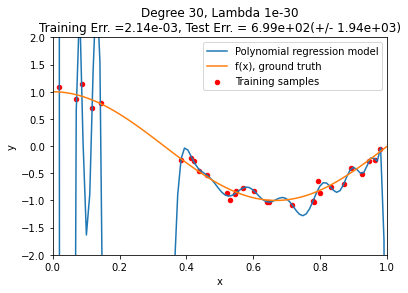

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/y

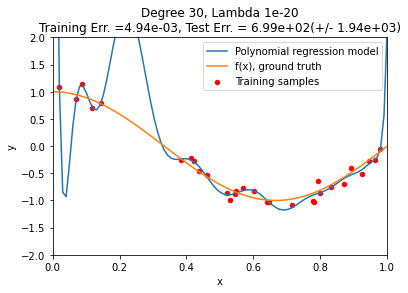

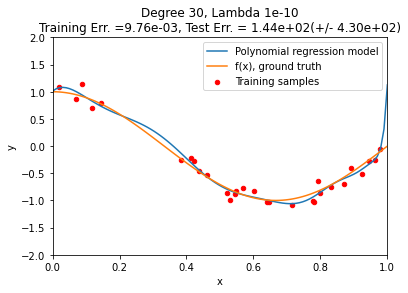

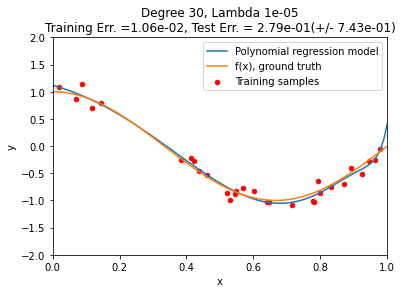

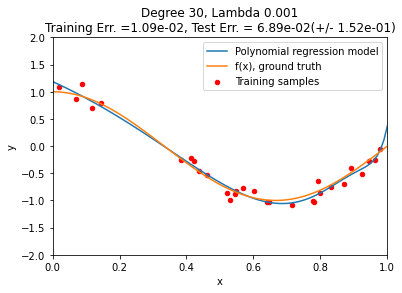

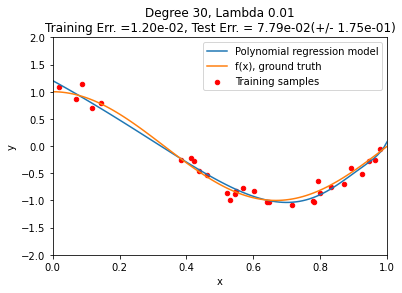

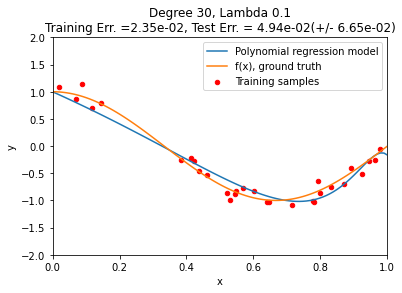

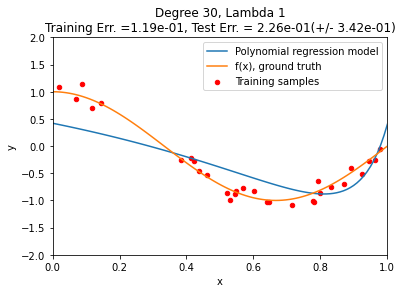

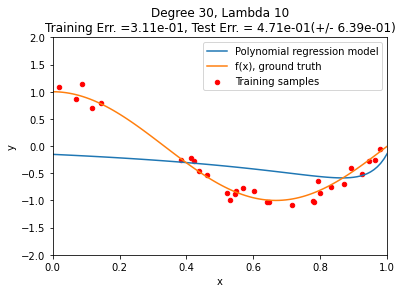

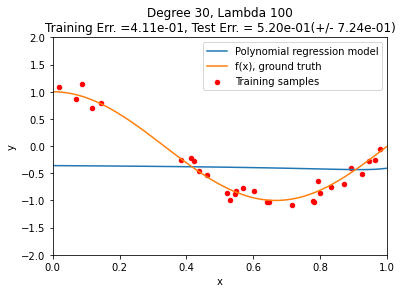

In [5]:
for a in alphas:

    #Setup of ridge regression models
    #include_bias: デフォルトではTrueで、バイアス項（=すべて1の列）を入れてくれます。
    polynomial_features = PolynomialFeatures(degree, include_bias=False)
    linear_regression = Ridge(alpha=a)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    #Evaluate training error
    y_pred=pipeline.predict(X[:, np.newaxis])
    mse=mean_squared_error(y, y_pred)
                              
    # Evaluate test error using crossvalidation
    #cv:分割数
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    #グラフ化
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Polynomial regression model")
    plt.plot(X_test, f(X_test), label="f(x), ground truth")
    plt.scatter(X, y, color='red', s=20, marker='o', label="Training samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}, Lambda {}\nTraining Err. ={:.2e}, Test Err. = {:.2e}(+/- {:.2e})".format(
        degree, a, mse,-scores.mean(), scores.std()))
    plt.show()
